### work with tanh

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
X, y = make_moons(100, noise=0.25,random_state=2)

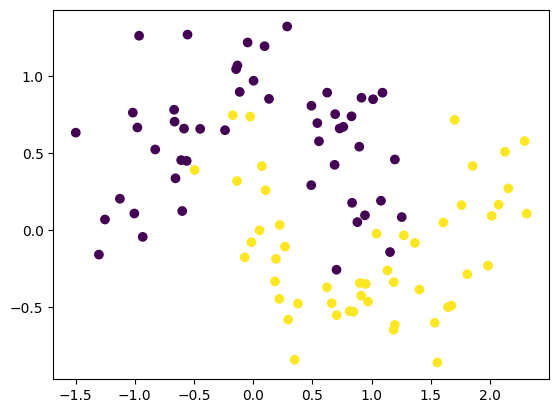

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [36]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\Ayush Maurya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.get_weights()


[array([[-0.17576516,  0.13755363, -0.1802848 ,  0.70534104,  0.1875897 ,
          0.3274483 ,  0.05666035,  0.43442613,  0.5690655 ,  0.5255328 ],
        [-0.608545  ,  0.6389244 , -0.0333665 ,  0.32128412, -0.05095315,
          0.52389926,  0.33268005, -0.34621274,  0.63484615,  0.45885843]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.07914737, -0.3462032 ,  0.44107956,  0.37859762, -0.35468003,
          0.54745674,  0.17158312, -0.5259277 ,  0.29638696,  0.20414287],
        [ 0.3982908 , -0.36486125,  0.3393739 , -0.30411965,  0.18804091,
         -0.29724854,  0.3102681 ,  0.19217038, -0.5353039 ,  0.53118014],
        [-0.37453452,  0.17565864, -0.23098153,  0.14794308,  0.04800111,
          0.29947817, -0.43256593,  0.36936456, -0.1050936 , -0.06861812],
        [ 0.2289958 ,  0.08088613,  0.44482046,  0.50943506, -0.2661616 ,
         -0.52429473, -0.08373606, -0.00193763,  0.53709745,  0.03733933],
        [-0.15600

In [38]:
initial_weights = model.get_weights()

In [39]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [40]:
model.set_weights(initial_weights)

In [41]:
model.get_weights()

[array([[ 0.4572777 , -0.46512067, -1.4572932 ,  0.7450818 , -0.7745359 ,
         -0.37635717, -0.13999864,  0.09137381, -0.06848299,  0.7325724 ],
        [ 1.4858694 , -0.90962   ,  0.30586526,  0.7774181 , -0.17416668,
          0.03938586,  0.20205908,  0.18171254,  1.1510817 ,  0.08833097]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.03280654, -0.01888141, -0.29067186, -0.09716826,  0.5861472 ,
         -0.50257665,  0.33960146, -0.04112923, -0.33429983,  0.05674585],
        [ 0.03671227,  0.39429656,  0.29171056,  0.38088697, -0.4527193 ,
          0.33358875,  0.24415183,  0.05399334,  0.24056876,  0.32392073],
        [ 0.10598458,  0.0638785 ,  0.0588737 ,  0.04885756,  0.09461034,
          0.23200907,  0.09393646, -0.2589023 ,  0.29637033,  0.19378504],
        [ 0.20392583,  0.7530791 , -0.30022338, -0.13658926, -0.29091904,
         -0.02334507,  0.10379075, -0.08794034,  0.43579775,  0.4285415 ],
        [-0.03740

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4023 - loss: 0.7012 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5461 - loss: 0.6875 - val_accuracy: 0.8500 - val_loss: 0.6755
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8500 - loss: 0.6728 - val_accuracy: 0.8500 - val_loss: 0.6582
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8211 - loss: 0.6602 - val_accuracy: 0.9000 - val_loss: 0.6420
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8508 - loss: 0.6468 - val_accuracy: 0.9000 - val_loss: 0.6262
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7930 - loss: 0.6376 - val_accuracy: 0.9000 - val_loss: 0.6103
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8203 - loss: 0.6218 - val_accuracy: 0.9000 - val_loss: 0.5946
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8281 - loss: 0.6078 - val_accuracy: 0.9000 - val_loss:

In [44]:
model.get_weights()

[array([[ 0.42556486, -0.4603492 , -1.7962381 ,  0.6750514 , -0.63207275,
         -0.40953156, -0.15877163, -0.09422177, -0.23958805,  0.66959137],
        [ 1.493199  , -0.96656245,  0.2840257 ,  0.7473551 , -0.08842477,
          0.13604279,  0.11678551,  0.06707147,  1.1566218 ,  0.1398411 ]],
       dtype=float32),
 array([ 0.01686313,  0.06620609,  0.25651702,  0.11970267, -0.03193427,
         0.03561837,  0.05911644, -0.06106685, -0.06687062, -0.01033857],
       dtype=float32),
 array([[ 1.7326529e-06, -8.9686610e-02, -3.5715377e-01, -1.1134875e-01,
          5.6989086e-01, -4.0651459e-01,  2.5803927e-01, -3.6192518e-02,
         -3.2920024e-01,  3.5749119e-02],
        [ 7.7967346e-02,  4.6159920e-01,  3.5040486e-01,  4.4181255e-01,
         -4.1699454e-01,  1.9911374e-01,  3.4226817e-01,  1.6076939e-02,
          2.4472435e-01,  3.4024081e-01],
        [ 1.9294968e-01,  1.6131921e-01,  3.6326718e-02,  1.0613006e-01,
          4.8263334e-02, -1.1149402e-02,  2.1269217e-01, -4

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 818us/step


<Axes: >

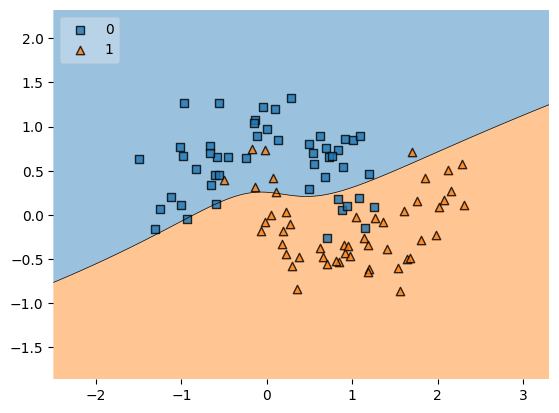

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)